# <font color="#114b98">Anticipez les besoins en consommation de bâtiments</font>

## <font color="#114b98">Notebook de prédiction des émissions de $CO_{2}$</font>

Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, notre équipe s’intéresse de près à la consommation et aux émissions des bâtiments non destinés à l’habitation.

Des relevés minutieux ont été effectués par les agents de la ville en 2016. Ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, nous voulons tenter de prédire **les émissions de $CO_{2}$** pour lesquels elles n’ont pas encore été mesurées.

Nous cherchons également à **évaluer l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions**, qui est fastidieux à calculer avec l’approche utilisée actuellement par notre équipe. Nous l'intégrerons dans la modélisation et jugerons de son intérêt.

## <font color="#114b98">Sommaire</font>
[1. Chargement du dataset](#section_1)

[2. Encodage avec OneHotEncoder et standardisation avec StandardScaler](#section_2)  

[3. Régression avec DummyRegressor](#section_3)   

[4. Régressions sans hyperparamétrage](#section_4)  

[5. Comparaison des régressions](#section_5)   

[6. Cross-Validation](#section_6)   

[7. Hyperparamétrage](#section_7) 

[8. Choix du meilleur modèle](#section_8) 

[9. Évaluation de l'intérêt de l'ENERGYSTARScore](#section_9)

[10. SHAP : SHapley Additive exPlanations](#section_10)

[11. Exemple de prédictions d'émissions de CO2](#section_11)

## <font color="#114b98" id="section_1">1. Chargement du dataset</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
sns.set()

In [3]:
plt.rc('axes', titlesize=22) 
plt.rc('axes', labelsize=18) 

In [4]:
path = 'N:/5 - WORK/1 - Projets/Projet 3/'
files = os.listdir(path)
files

['2016_Building_Energy_Benchmarking.csv',
 'Anticipez_les_besoins_en_consommation_de_bâtiments_Durand_Simon.zip',
 'data_seattle_clean.csv',
 'Durand_Simon_4_presentation_102022.pdf',
 'images',
 'ressources',
 'tutorats']

In [5]:
filename = files[2]
filename

'data_seattle_clean.csv'

In [6]:
%%time
data = pd.read_csv(path+filename, sep=',', low_memory=False)

CPU times: total: 31.2 ms
Wall time: 10 ms


In [7]:
data.head()

,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,ElectricityProp,NaturalGasProp,SteamUseProp,BuildingAge,...,Senior Care Community,Small- and Mid-Sized Office,Social/Meeting Hall,Strip Mall,Supermarket/Grocery Store,Swimming Pool,Urgent Care/Clinic/Other Outpatient,Vocational School,Wholesale Club/Supercenter,Worship Facility
0,2.564949,11.390023,0.000000,60.0,15.824652,5.525373,0.529177,0.171177,0.268728,88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.484907,11.547974,0.145453,61.0,15.974742,5.693261,0.374270,0.593813,0.000000,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.737670,13.770629,0.205748,43.0,18.118725,7.645053,0.669849,0.020204,0.291688,46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.397895,11.023878,0.000000,56.0,15.753792,5.660979,0.398590,0.260726,0.318772,89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.944439,12.075856,0.353115,75.0,16.500395,6.226556,0.366295,0.600689,0.000000,35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data.dtypes

NumberofFloors                         float64
PropertyGFATotal                       float64
PropertyGFAParking                     float64
ENERGYSTARScore                        float64
SiteEnergyUseWN(kBtu)                  float64
                                        ...   
Swimming Pool                          float64
Urgent Care/Clinic/Other Outpatient    float64
Vocational School                      float64
Wholesale Club/Supercenter             float64
Worship Facility                       float64
Length: 74, dtype: object

In [9]:
df = data.copy()

In [10]:
data.drop(['ENERGYSTARScore'], inplace=True, axis=1)

In [11]:
print("Le dataset compte {} lignes et {} colonnes.".format(data.shape[0], data.shape[1]))

Le dataset compte 1603 lignes et 73 colonnes.


In [12]:
print('Données manquantes (%) : ', data.isna().sum().sum()/(data.shape[0]*data.shape[1])*100)

Données manquantes (%) :  0.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603 entries, 0 to 1602
Data columns (total 73 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   NumberofFloors                                        1603 non-null   float64
 1   PropertyGFATotal                                      1603 non-null   float64
 2   PropertyGFAParking                                    1603 non-null   float64
 3   SiteEnergyUseWN(kBtu)                                 1603 non-null   float64
 4   TotalGHGEmissions                                     1603 non-null   float64
 5   ElectricityProp                                       1603 non-null   float64
 6   NaturalGasProp                                        1603 non-null   float64
 7   SteamUseProp                                          1603 non-null   float64
 8   BuildingAge                                           1603

Je supprime la variable 'SiteEnergyUseWN(kBtu)' qui ne sera pas utilisée dans ce notebook.

In [14]:
data = data[data.drop('SiteEnergyUseWN(kBtu)', axis=1).columns]

In [15]:
print("Le dataset compte {} lignes et {} colonnes.".format(data.shape[0], data.shape[1]))

Le dataset compte 1603 lignes et 72 colonnes.


## <font color="#114b98" id="section_2">2. Encodage avec OneHotEncoder et standardisation avec StandardScaler</font>

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [17]:
num_columns = list(data.select_dtypes(include=['float64','int64']).drop(['TotalGHGEmissions'], axis=1).columns)

In [18]:
transfo_num_columns = Pipeline(steps=[('standard', StandardScaler())])

In [19]:
obj_columns = list(data.select_dtypes(include=['object']).columns)

In [20]:
transfo_obj_columns = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [21]:
preparation = ColumnTransformer(
    transformers=[
        ('quantitative', transfo_num_columns , num_columns),
        ('qualitative', transfo_obj_columns , obj_columns)])

## <font color="#114b98" id="section_3">3. Régression avec DummyRegressor</font>

In [22]:
from sklearn.dummy import DummyRegressor

In [23]:
model_dummy = Pipeline(steps=[('preparation', preparation),
                      ('DummyRegressor', DummyRegressor())])

In [24]:
X = data[data.drop(['TotalGHGEmissions'], axis=1).columns]

In [25]:
y = data[['TotalGHGEmissions']]

In [26]:
X.shape

(1603, 71)

In [27]:
y.shape

(1603, 1)

Je sépare le jeu de données en un jeu d'entraînement (80%) et un jeu de test (20%).

In [28]:
from sklearn.model_selection import train_test_split 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [30]:
preparation.fit_transform(X_train).shape

(1282, 71)

In [31]:
nn_input = preparation.fit_transform(X_train).shape[1]

In [32]:
model_dummy.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('quantitative',
                                                  Pipeline(steps=[('standard',
                                                                   StandardScaler())]),
                                                  ['NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'PropertyGFAParking',
                                                   'ElectricityProp',
                                                   'NaturalGasProp',
                                                   'SteamUseProp',
                                                   'BuildingAge',
                                                   'Adult Education',
                                                   'Automobile Dealership',
                                                   'Bank Branch',
                                      

In [33]:
y_pred = model_dummy.predict(X_test)

Je crée 4 dictionnaires dans lesquels je vais enregistrer les résultats de mes tests :
 - R² sur le jeu d'entraînement
 - R² sur le jeu de test
 - MAE : erreur absolue moyenne, moyenne arithmétique des valeurs absolues des écarts
 - RMSE : erreur quadratique moyenne : racine carrée de la moyenne des carrés des erreurs

In [34]:
train_scores = {} 
test_scores = {}
maes = {}
rmses = {}

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [36]:
def score(estimator):
    """Compute and print scores"""
    """Saves scores in dictionnaries"""
    train_score = estimator.score(X_train, y_train)
    test_score = r2_score(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    
    model_name = str(estimator.get_params).split(' ')[-2][2:-2]
    if model_name == '':
        model_name = str(estimator.get_params).split(' ')[-1][0:16]

    train_scores[model_name] = f"{train_score:.3f}"
    test_scores[model_name] = f"{test_score:.3f}"
    maes[model_name] = f"{mae:.3f}"
    rmses[model_name] = f"{rmse:.3f}"    
    
    print(f'\
            R² Train : {train_score} \n\
            R² Test : {test_score}\n\
            M.A.E. : {mae}\n\
            R.M.S.E. : {rmse}')

In [37]:
score(model_dummy)

            R² Train : 0.0 
            R² Test : -1.0264869760190365e-05
            M.A.E. : 1.1760503538183404
            R.M.S.E. : 1.4656095047578195


## <font color="#114b98" id="section_4">4. Régressions sans hyperparamétrage</font>

### RandomForestRegressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
model_randomforest = Pipeline(steps=[('preparation', preparation),
                      ('RandomForest', RandomForestRegressor(random_state=0))])

In [40]:
model_randomforest.fit(X_train, y_train.values.ravel());

In [41]:
y_pred = model_randomforest.predict(X_test)

In [42]:
score(model_randomforest)

            R² Train : 0.9726770511267553 
            R² Test : 0.8013007049063086
            M.A.E. : 0.49848447188623285
            R.M.S.E. : 0.6533023299110957


### GradientBoostingRegressor

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

In [44]:
model_gradientboosting = Pipeline(steps=[('preparation', preparation),
                      ('GradientBoosting', GradientBoostingRegressor(random_state=0))])

In [45]:
model_gradientboosting.fit(X_train, y_train.values.ravel());

In [46]:
y_pred = model_gradientboosting.predict(X_test)

In [47]:
score(model_gradientboosting)

            R² Train : 0.9013680128204319 
            R² Test : 0.8203811412216441
            M.A.E. : 0.4801455224660872
            R.M.S.E. : 0.6211435934406646


### ElasticNet

In [48]:
from sklearn.linear_model import ElasticNet

In [49]:
model_elasticnet = Pipeline(steps=[('preparation', preparation),
                      ('ElasticNet', ElasticNet(random_state=0))])

In [50]:
model_elasticnet.fit(X_train, y_train.values.ravel());

In [51]:
y_pred = model_elasticnet.predict(X_test)

In [52]:
score(model_elasticnet)

            R² Train : 0.2555083082093901 
            R² Test : 0.26330853010940314
            M.A.E. : 1.0062086384806133
            R.M.S.E. : 1.2579369221628394


### ExtraTreesRegressor

In [53]:
from sklearn.ensemble import ExtraTreesRegressor

In [54]:
model_extratrees = Pipeline(steps=[('preparation', preparation),
                      ('ExtraTrees', ExtraTreesRegressor(random_state=0))])

In [55]:
model_extratrees.fit(X_train, y_train.values.ravel());

In [56]:
y_pred = model_extratrees.predict(X_test)

In [57]:
score(model_extratrees)

            R² Train : 1.0 
            R² Test : 0.808954792820812
            M.A.E. : 0.48667632253052523
            R.M.S.E. : 0.6405958447479831


### Support Vector Regression

In [58]:
from sklearn.svm import SVR

In [59]:
model_supportvector = Pipeline(steps=[('preparation', preparation),
                      ('SupportVector', SVR())])

In [60]:
str(model_supportvector.get_params).split(' ')[-2][2:-2]

'SupportVector'

In [61]:
model_supportvector.fit(X_train, y_train.values.ravel());

In [62]:
y_pred = model_supportvector.predict(X_test)

In [63]:
score(model_supportvector)

            R² Train : 0.856580957420937 
            R² Test : 0.7801917752231682
            M.A.E. : 0.48902409691692095
            R.M.S.E. : 0.6871285808717849


### AdaBoost

In [64]:
from sklearn.ensemble import AdaBoostRegressor

In [65]:
model_adaboost = Pipeline(steps=[('preparation', preparation),
                                 ('AdaBoost', AdaBoostRegressor(random_state=0))])

In [66]:
model_adaboost.fit(X_train, y_train.values.ravel());

In [67]:
y_pred = model_adaboost.predict(X_test)

In [68]:
score(model_adaboost)

            R² Train : 0.7493004801142744 
            R² Test : 0.707259964531554
            M.A.E. : 0.6238067021334225
            R.M.S.E. : 0.7929706339343082


### XGBoost

In [69]:
from xgboost import XGBRegressor

In [70]:
model_xgboost = Pipeline(steps=[('preparation', preparation),
                      ('XGBoost', XGBRegressor(random_state=0))])

In [71]:
model_xgboost.fit(X_train, y_train.values.ravel());

In [72]:
y_pred = model_xgboost.predict(X_test)

In [73]:
y_pred_best = model_xgboost.predict(X_test)

In [74]:
train_score = model_xgboost.score(X_train, y_train)
test_score = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

model_name = 'XGBoost'

train_scores[model_name] = f"{train_score:.3f}"
test_scores[model_name] = f"{test_score:.3f}"
maes[model_name] = f"{mae:.3f}"
rmses[model_name] = f"{rmse:.3f}"

print(f'\
        R² Train : {train_score} \n\
        R² Test : {test_score}\n\
        M.A.E. : {mae}\n\
        R.M.S.E. : {rmse}')

        R² Train : 0.9872639631430522 
        R² Test : 0.8329108840164886
        M.A.E. : 0.4649012162567059
        R.M.S.E. : 0.5990873156944905


### Neural Network

In [75]:
    from scikeras.wrappers import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense

In [76]:
nn_input

71

In [77]:
def baseline_model():
    model = Sequential()
    model.add(Dense(nn_input, input_shape=(nn_input,), kernel_initializer='normal', activation='relu'))
    model.add(Dense(nn_input, input_shape=(nn_input,), kernel_initializer='normal', activation='relu'))
    model.add(Dense(nn_input//2, input_shape=(nn_input,), kernel_initializer='normal', activation='relu'))
    model.add(Dense(nn_input//4, input_shape=(nn_input//2,), kernel_initializer='normal', activation='relu')) 
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

estimator = KerasRegressor(model=baseline_model, epochs=100, batch_size=5, verbose=0)

model_nn = Pipeline(steps=[('preparation', preparation),
                      ('neuralnetwork', estimator)])

model_nn.fit(X_train, y_train.values.ravel())

y_pred = model_nn.predict(X_test)

train_score = r2_score(y_train, model_nn.predict(X_train)).round(3)
test_score = r2_score(y_test,y_pred).round(3)
mae = mean_absolute_error(y_test,y_pred).round(3)
rmse = np.sqrt(mean_squared_error(y_test,y_pred)).round(3)

model_name = 'NeuralNetwork'

train_scores[model_name] = f"{train_score:.3f}"
test_scores[model_name] = f"{test_score:.3f}"
maes[model_name] = f"{mae:.3f}"
rmses[model_name] = f"{rmse:.3f}"
    
print(f'\
        R² Train : {train_score}\n\
        R² Test : {test_score}\n\
        M.A.E. : {mae}\n\
        R.M.S.E. : {rmse}')

        R² Train : 0.953
        R² Test : 0.827
        M.A.E. : 0.448
        R.M.S.E. : 0.61


## <font color="#114b98" id="section_5">5. Comparaison des régressions</font>

In [78]:
regressions = pd.DataFrame(train_scores, index=['R² Train'])

In [79]:
regressions.loc['R² Test',:] = test_scores
regressions.loc['M.A.E.',:] = maes
regressions.loc['R.M.S.E.',:] = rmses

In [80]:
regressions

,DummyRegressor,RandomForest,GradientBoosting,ElasticNet,ExtraTrees,SupportVector,AdaBoost,XGBoost,NeuralNetwork
R² Train,0.000,0.973,0.901,0.256,1.000,0.857,0.749,0.987,0.953
R² Test,-0.000,0.801,0.820,0.263,0.809,0.780,0.707,0.833,0.827
M.A.E.,1.176,0.498,0.480,1.006,0.487,0.489,0.624,0.465,0.448
R.M.S.E.,1.466,0.653,0.621,1.258,0.641,0.687,0.793,0.599,0.610


Les modèles avec des arbres semblent être ceux les plus efficaces pour répondre au problème.

Nous pouvons regarder graphiquement l'efficacité de cette simple régression du GradientBoosting.

In [81]:
exp = pd.DataFrame(y_test)
exp['TotalGHGEmissions_prédicions'] = list(y_pred_best.round(2))
exp.columns = ['TotalGHGEmissions_test', 'TotalGHGEmissions_prédicions']

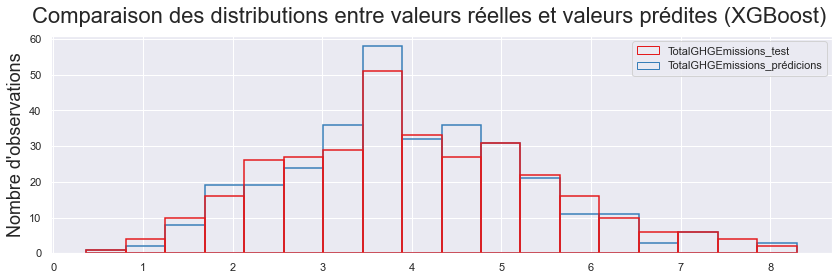

In [82]:
fig = plt.figure(figsize=(14,4))
fig.suptitle('Comparaison des distributions entre valeurs réelles et valeurs prédites (XGBoost)', size=22)
sns.histplot(data=exp, fill=False, palette="Set1")
plt.ylabel("Nombre d'observations")    
plt.show()

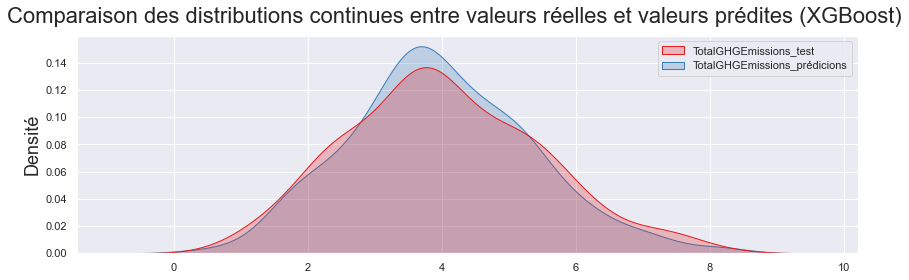

In [83]:
fig = plt.figure(figsize=(14,4))
fig.suptitle('Comparaison des distributions continues entre valeurs réelles et valeurs prédites (XGBoost)', size=22)
sns.kdeplot(data=exp, fill=True, palette="Set1")
plt.ylabel('Densité')    
plt.show()

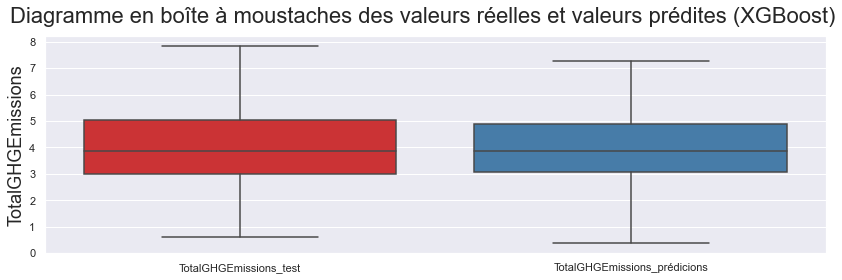

In [84]:
fig = plt.figure(figsize=(14,4))
fig.suptitle('Diagramme en boîte à moustaches des valeurs réelles et valeurs prédites (XGBoost)', size=22)
sns.boxplot(data=exp, palette="Set1", showfliers = False)
plt.ylabel('TotalGHGEmissions')    
plt.show()

## <font color="#114b98" id="section_6">6. Cross-Validation</font>

Je divise le jeu de données dans cette validation croisée à l'aide de RepeatedKFold.

In [85]:
from sklearn.model_selection import RepeatedKFold

In [86]:
rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=0)

Je crée un dictionnaire avec les 5 meilleurs régresseurs de mon analyse précédente.

In [87]:
regressors = {                   
                   'Random Forest': RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0),
                   'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=0),
                   'Extra Trees': ExtraTreesRegressor(n_estimators=100, n_jobs=-1, random_state=0),
                   'SupportVector' : SVR(),
                   'XGBoost': XGBRegressor(n_estimators=100, random_state=0)
                  }

Je crée 3 dictionnaires dans lesquels je vais enregistrer les résultats de mes tests :
 - R² sur le jeu de test
 - MAE : erreur absolue moyenne, moyenne arithmétique des valeurs absolues des écarts
 - RMSE : erreur quadratique moyenne : racine carrée de la moyenne des carrés des erreurs

In [88]:
r2_2 = {}
rmse_2 = {}
mae_2 = {}

In [89]:
from sklearn.model_selection import cross_validate

In [90]:
for name_reg, reg in regressors.items() :
    print("----------------------------------------------------")
    print("---", name_reg, "---\n")
    
    pipeline = Pipeline([("preprocess", preparation),("regressor", reg)])

    scores = cross_validate(pipeline,
                            X,
                            y.values.ravel(),
                            cv=rkf,
                            scoring=["r2",
                                     "neg_mean_absolute_error",
                                     "neg_mean_squared_error"])
    
    print("    R²")
    r2_2[name_reg] = scores['test_r2']
    print("\t - Moyenne : {:.3f}".format(r2_2[name_reg].mean()))
    print("\t - Ecart-type : {:.3f}\n".format(r2_2[name_reg].std()))

    print("    M.A.E.")
    mae_2[name_reg] = -scores["test_neg_mean_absolute_error"]
    print("\t - Moyenne : {:.3f}".format(mae_2[name_reg].mean()))
    print("\t - Ecart-type : {:.3f}\n".format(mae_2[name_reg].std()))
    
    print("    R.M.S.E.")
    rmse_2[name_reg] = np.sqrt(-scores["test_neg_mean_squared_error"])
    print("\t - Moyenne : {:.3f}".format(rmse_2[name_reg].mean()))
    print("\t - Ecart-type : {:.3f}\n".format(rmse_2[name_reg].std()))

----------------------------------------------------
--- Random Forest ---

    R²
	 - Moyenne : 0.805
	 - Ecart-type : 0.016

    M.A.E.
	 - Moyenne : 0.472
	 - Ecart-type : 0.030

    R.M.S.E.
	 - Moyenne : 0.632
	 - Ecart-type : 0.028

----------------------------------------------------
--- Gradient Boosting ---

    R²
	 - Moyenne : 0.828
	 - Ecart-type : 0.007

    M.A.E.
	 - Moyenne : 0.448
	 - Ecart-type : 0.023

    R.M.S.E.
	 - Moyenne : 0.594
	 - Ecart-type : 0.022

----------------------------------------------------
--- Extra Trees ---

    R²
	 - Moyenne : 0.819
	 - Ecart-type : 0.009

    M.A.E.
	 - Moyenne : 0.450
	 - Ecart-type : 0.024

    R.M.S.E.
	 - Moyenne : 0.609
	 - Ecart-type : 0.024

----------------------------------------------------
--- SupportVector ---

    R²
	 - Moyenne : 0.785
	 - Ecart-type : 0.020

    M.A.E.
	 - Moyenne : 0.462
	 - Ecart-type : 0.022

    R.M.S.E.
	 - Moyenne : 0.664
	 - Ecart-type : 0.026

------------------------------------------

In [91]:
average = 0
print("Moyennes des R²\n")
for array in r2_2:
    average = average + r2_2[array].mean()
    print(round(r2_2[array].mean(), 3))

Moyennes des R²

0.805
0.828
0.819
0.785
0.819


In [92]:
def graphical_display(results, title) :
    # Fonction qui permet d'afficher un barplot des résultats : moyenne et écart-type
    x = list(results)
    y = np.array(list(results.values()))
    score_mean = [score.mean() for score in np.array(list(results.values()))]
    score_std = [score.std() for score in np.array(list(results.values()))]
    
    palette = sns.color_palette('pastel')
    colors = palette[0: len(results)]

    fig, axs = plt.subplots(2, 1, constrained_layout=True, figsize=(14,6))
    fig.suptitle(title, fontsize=22)
    axs[0].bar(x=x, height=score_mean, color=colors)
    axs[0].set_ylabel("Mean")
    axs[0].errorbar(range(len(score_mean)), score_mean, yerr=score_std, fmt='none', ecolor='black')
    axs[1].bar(x=x, height=score_std, color=colors)
    axs[1].set_ylabel("Variance")

    plt.show()

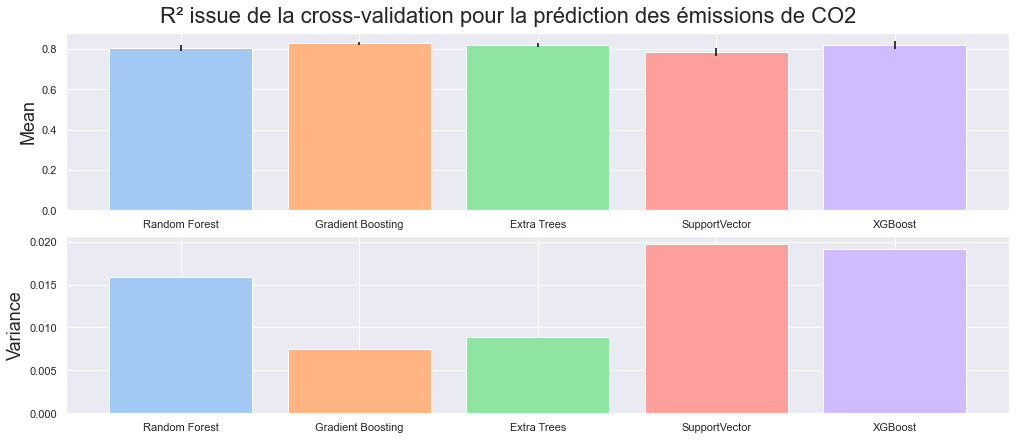

In [93]:
graphical_display(r2_2, "R² issue de la cross-validation pour la prédiction des émissions de CO2")

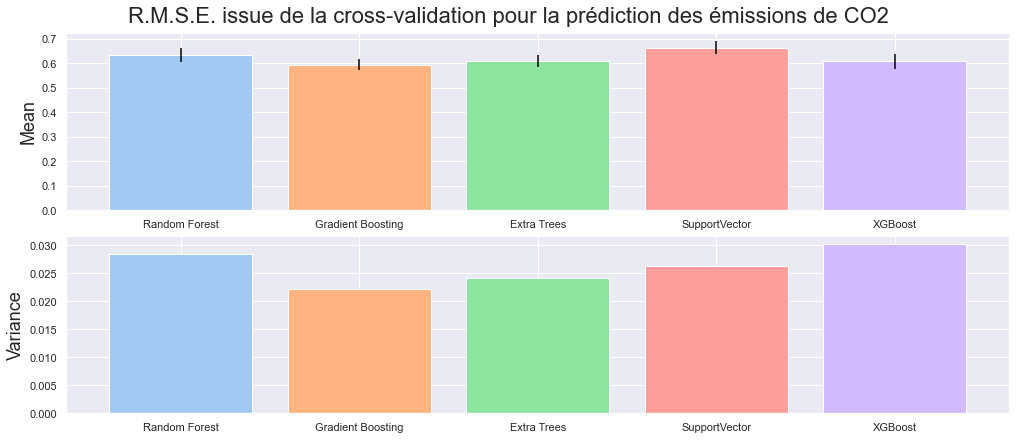

In [94]:
graphical_display(rmse_2, "R.M.S.E. issue de la cross-validation pour la prédiction des émissions de CO2")

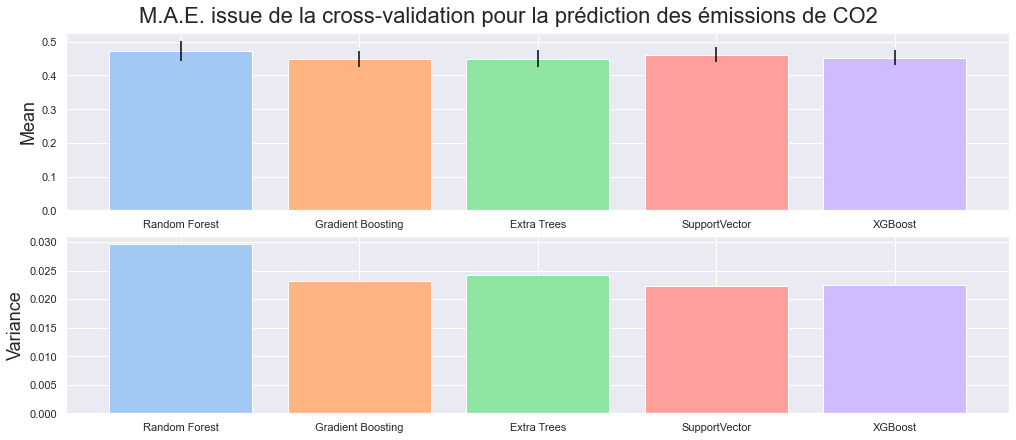

In [95]:
graphical_display(mae_2, "M.A.E. issue de la cross-validation pour la prédiction des émissions de CO2")

Les trois meilleurs regresseurs (plus faible variance et meilleurs R²) sont :
 - 'Gradient Boosting'
 - 'Extra Trees'
 - 'XGBoost'

Je vais donc utiliser ces trois regresseurs et les hyperparamétrer.

## <font color="#114b98" id="section_7">7. Hyperparamétrage</font>

In [96]:
# Dictionnaire de regresseurs
regressors_2 = {   
                   'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=0),
                   'Extra Trees': ExtraTreesRegressor(n_estimators=100, n_jobs=-1, random_state=0),
                   'XGBoost': XGBRegressor(n_estimators=100, random_state=0),
                }

Je crée un dictionnaire des GridSearch afin de conserver tous les résultats.

In [97]:
grid_search_results = {}

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
def grid_search(regressors, pipeline, param_grid, X, y, n_splits, n_repeats, display=True) :
    
    """
    Optimise une liste d'estimateurs et retourne le meilleur
    regressors(dict): Dictionnaire d'estimateurs
    pipeline : pipeline de transformation de données
    param_grid(dict) : dictionnaire de dictionnaires de paramètres
    X(np.array): jeux de données
    y(np.array): prédiction
    
    """
    
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=0)
    
    grid_search_dict = {}
    
    # Meilleur score
    best_score = float('inf')
    
    # Dictionnaire des modèles hyperparamétrés
    rmse_mean = {}
    rmse_std = {}

    for name_reg, regressor in regressors.items() :
        print("-------------------------------------------------------")
        print("---", name_reg, "---\n")
        prepare_select_and_predict_pipeline = Pipeline([("preprocess", preparation),("regressor", regressor)])

    
        grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline,
                                             param_grid[name_reg],
                                             scoring='neg_mean_squared_error',
                                             cv=rkf)
        
        # Entrainement du modèle
        grid_search_prep.fit(X, y)
        
        # Sauvegarde du modèle
        grid_search_dict[name_reg] = grid_search_prep
        
        best_model_index = grid_search_prep.best_index_
        score = [np.sqrt(-grid_search_prep.cv_results_["split" + str(i) + "_test_score"][best_model_index])
                 for i in range(n_splits)]
        
        # Moyenne et écart-type de la RMSE
        mean_score, std_score = np.mean(score), np.std(score)
        rmse_mean[name_reg], rmse_std[name_reg] = mean_score, std_score
        score = grid_search_prep.best_estimator_.score(X, y)
        
        print("Paramètres du meilleur modèle : \n")
        for params, values in grid_search_prep.best_params_.items():
             print("\t - ", params, ":", values)
        print("\nRésultats :")
        print("\n\t - R² score sur le jeu d'entrainement : {:.3f}".format(score))
        print("\t - Mean of RMSE : {:.3f}".format(mean_score))
        print("\t - Ecart-type : {:.3f}\n".format(std_score))
        
        if mean_score < best_score :
            best_score = mean_score
            best_model = grid_search_prep.best_estimator_
            
    return grid_search_dict

In [100]:
# Hyperparamères pour les modèles ensemblistes d'arbres de regression
param_grid_reg_tree = {
    'regressor__n_estimators': range(240, 300, 20), # Nombre d'arbres
    'regressor__max_depth': range(4, 24, 4), # Nombre de profondeurs maximums
    'regressor__max_features': range(24, 40, 4) # Nombre de maximum de features
}

# Ajout du paramètre learning rate pour le Gradient Boosting
param_grid_gb = param_grid_reg_tree.copy()
param_grid_gb["regressor__learning_rate"] = [0.03,0.05,0.08]
                                             
# Ajout des paramètres pour le XGBoost
param_grid_xgb = {
    'regressor__n_estimators': [150,175,200],
    'regressor__learning_rate': [0.03,0.05,0.08],
    'regressor__booster' : ['gbtree','gblinear'],
}

# Dictionnaire de grille de paramètres
param_grid = {
              'Gradient Boosting': param_grid_gb,
              'Extra Trees': param_grid_reg_tree,
              'XGBoost': param_grid_xgb,
             }

In [101]:
# Selection du meilleur modèle
grid_search_results['TotalGHGEmissions'] = grid_search(regressors_2, 
                                                      preparation,
                                                      param_grid,
                                                      X,
                                                      y.values.ravel(),
                                                      n_splits = 5,
                                                      n_repeats = 2)

-------------------------------------------------------
--- Gradient Boosting ---

Paramètres du meilleur modèle : 

	 -  regressor__learning_rate : 0.05
	 -  regressor__max_depth : 4
	 -  regressor__max_features : 32
	 -  regressor__n_estimators : 280

Résultats :

	 - R² score sur le jeu d'entrainement : 0.930
	 - Mean of RMSE : 0.574
	 - Ecart-type : 0.023

-------------------------------------------------------
--- Extra Trees ---

Paramètres du meilleur modèle : 

	 -  regressor__max_depth : 20
	 -  regressor__max_features : 32
	 -  regressor__n_estimators : 280

Résultats :

	 - R² score sur le jeu d'entrainement : 0.990
	 - Mean of RMSE : 0.599
	 - Ecart-type : 0.032

-------------------------------------------------------
--- XGBoost ---

Paramètres du meilleur modèle : 

	 -  regressor__booster : gbtree
	 -  regressor__learning_rate : 0.08
	 -  regressor__n_estimators : 175

Résultats :

	 - R² score sur le jeu d'entrainement : 0.960
	 - Mean of RMSE : 0.586
	 - Ecart-type : 0

## <font color="#114b98" id="section_8">8. Choix du meilleur modèle</font>

In [102]:
regressors_3 = {          
                   'Gradient Boosting': GradientBoostingRegressor(n_estimators=280, 
                                                                  max_features=32,
                                                                  max_depth=4,
                                                                  learning_rate=0.05,
                                                                  random_state=0),
    
                   'Extra Trees': ExtraTreesRegressor(n_estimators=280, 
                                                     max_features=32,
                                                     max_depth=20,
                                                     n_jobs=-1, 
                                                     random_state=0),
    
                   'XGBoost': XGBRegressor(n_estimators=175, 
                                           booster='gbtree',
                                           learning_rate=0.08,
                                           random_state=0),
                  }

In [103]:
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)

In [104]:
r2_3 = {}
rmse_3 = {}
mae_3 = {}

In [105]:
for name_reg, reg in regressors_3.items() :
    print("----------------------------------------------------")
    print("---", name_reg, "---\n")
    
    pipeline = Pipeline([("preprocess", preparation),("regressor", reg)])

    scores = cross_validate(pipeline,
                            X,
                            y.values.ravel(),
                            cv=rkf,
                            scoring=["r2",
                                     "neg_mean_absolute_error",
                                     "neg_mean_squared_error"])
    
    print("    R²")
    r2_3[name_reg] = scores['test_r2']
    print("\t - Moyenne : {:.3f}".format(r2_3[name_reg].mean()))
    print("\t - Ecart-type : {:.3f}\n".format(r2_3[name_reg].std()))

    print("    M.A.E.")
    mae_3[name_reg] = -scores["test_neg_mean_absolute_error"]
    print("\t - Moyenne : {:.3f}".format(mae_3[name_reg].mean()))
    print("\t - Ecart-type : {:.3f}\n".format(mae_3[name_reg].std()))
    
    print("    R.M.S.E.")
    rmse_3[name_reg] = np.sqrt(-scores["test_neg_mean_squared_error"])
    print("\t - Moyenne : {:.3f}".format(rmse_3[name_reg].mean()))
    print("\t - Ecart-type : {:.3f}\n".format(rmse_3[name_reg].std()))

----------------------------------------------------
--- Gradient Boosting ---

    R²
	 - Moyenne : 0.834
	 - Ecart-type : 0.012

    M.A.E.
	 - Moyenne : 0.435
	 - Ecart-type : 0.017

    R.M.S.E.
	 - Moyenne : 0.583
	 - Ecart-type : 0.024

----------------------------------------------------
--- Extra Trees ---

    R²
	 - Moyenne : 0.824
	 - Ecart-type : 0.013

    M.A.E.
	 - Moyenne : 0.443
	 - Ecart-type : 0.017

    R.M.S.E.
	 - Moyenne : 0.600
	 - Ecart-type : 0.024

----------------------------------------------------
--- XGBoost ---

    R²
	 - Moyenne : 0.831
	 - Ecart-type : 0.015

    M.A.E.
	 - Moyenne : 0.439
	 - Ecart-type : 0.018

    R.M.S.E.
	 - Moyenne : 0.588
	 - Ecart-type : 0.026



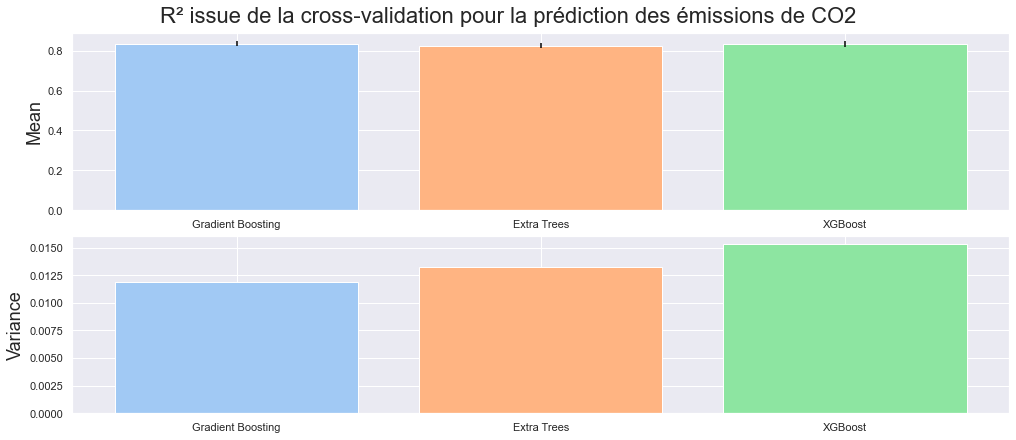

In [106]:
graphical_display(r2_3, "R² issue de la cross-validation pour la prédiction des émissions de CO2")

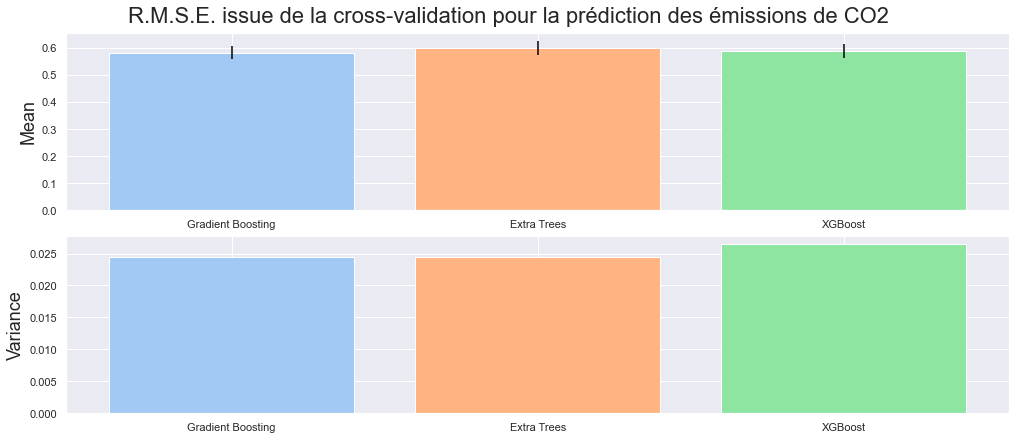

In [107]:
graphical_display(rmse_3, "R.M.S.E. issue de la cross-validation pour la prédiction des émissions de CO2")

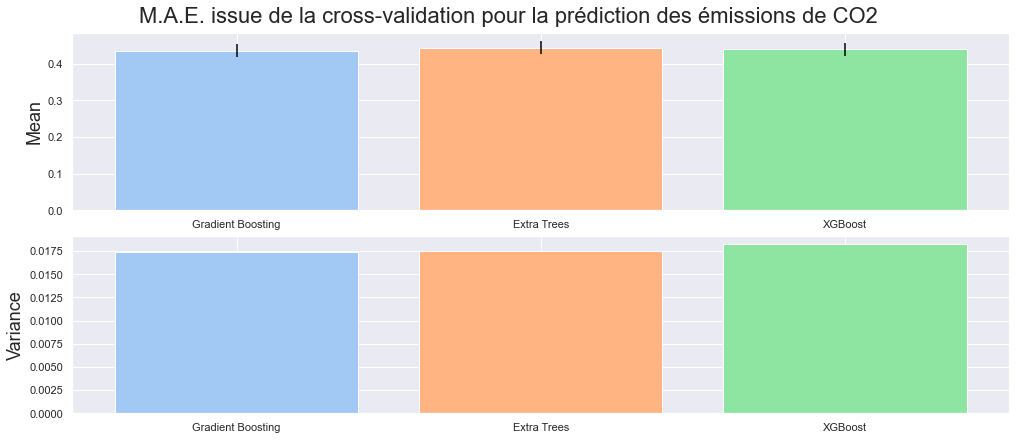

In [108]:
graphical_display(mae_3, "M.A.E. issue de la cross-validation pour la prédiction des émissions de CO2")

In [109]:
final_model = {}

**Mon meilleur modèle est celui du Gradient Boosting avec notament un R² de 0,834.**

In [110]:
final_model["TotalGHGEmissions"] = grid_search_results["TotalGHGEmissions"]["Gradient Boosting"].best_estimator_

In [111]:
final_model

{'TotalGHGEmissions': Pipeline(steps=[('preprocess',
                  ColumnTransformer(transformers=[('quantitative',
                                                   Pipeline(steps=[('standard',
                                                                    StandardScaler())]),
                                                   ['NumberofFloors',
                                                    'PropertyGFATotal',
                                                    'PropertyGFAParking',
                                                    'ElectricityProp',
                                                    'NaturalGasProp',
                                                    'SteamUseProp',
                                                    'BuildingAge',
                                                    'Adult Education',
                                                    'Automobile Dealership',
                                                    'Bank Branch',
    

## <font color="#114b98" id="section_9">9. Évaluation de l'intérêt de l'ENERGYSTARScore</font>

L'Energy Star Score est un score entre 1 et 100 qui reflète l'efficacité énergétique d'un bâtiment parmi les bâtiments similaires déjà certifiés. Un score de 50 signifie qu'il est dans la médiane alors qu'un score au dessus de 75 indique qu'il s'agit d'un bâtiment à haute performance.

In [112]:
df.head()

,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,ElectricityProp,NaturalGasProp,SteamUseProp,BuildingAge,...,Senior Care Community,Small- and Mid-Sized Office,Social/Meeting Hall,Strip Mall,Supermarket/Grocery Store,Swimming Pool,Urgent Care/Clinic/Other Outpatient,Vocational School,Wholesale Club/Supercenter,Worship Facility
0,2.564949,11.390023,0.000000,60.0,15.824652,5.525373,0.529177,0.171177,0.268728,88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.484907,11.547974,0.145453,61.0,15.974742,5.693261,0.374270,0.593813,0.000000,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.737670,13.770629,0.205748,43.0,18.118725,7.645053,0.669849,0.020204,0.291688,46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.397895,11.023878,0.000000,56.0,15.753792,5.660979,0.398590,0.260726,0.318772,89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.944439,12.075856,0.353115,75.0,16.500395,6.226556,0.366295,0.600689,0.000000,35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
df = df[df.drop('SiteEnergyUseWN(kBtu)', axis=1).columns]

Je supprime les observations pour lesquelles l'ENERGYSTARScore n'est pas connu.

In [114]:
mask_index = df[df['ENERGYSTARScore'].isna()].index

In [115]:
df.drop(mask_index, axis=0, inplace=True)

In [116]:
# Préparation
num_columns = list(df.select_dtypes(include=['float64','int64']).drop(['TotalGHGEmissions'], axis=1).columns)
transfo_num_columns = Pipeline(steps=[('standard', StandardScaler())])
preparation = ColumnTransformer(transformers=[('quantitative', transfo_num_columns , num_columns)])
X = df[df.drop(['TotalGHGEmissions'], axis=1).columns]
y = df[['TotalGHGEmissions']]

In [117]:
# Dictionnaire de regresseurs
regressors_en = {                   
                   'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=0),
                }

In [118]:
# Selection du meilleur modèle
grid_search_results['TotalGHGEmissions'] = grid_search(regressors_en, 
                                                       preparation,
                                                       param_grid,
                                                       X,
                                                       y.values.ravel(),
                                                       n_splits = 5,
                                                       n_repeats = 1)

-------------------------------------------------------
--- Gradient Boosting ---

Paramètres du meilleur modèle : 

	 -  regressor__learning_rate : 0.08
	 -  regressor__max_depth : 4
	 -  regressor__max_features : 32
	 -  regressor__n_estimators : 280

Résultats :

	 - R² score sur le jeu d'entrainement : 0.988
	 - Mean of RMSE : 0.399
	 - Ecart-type : 0.035



In [119]:
regressors_6 = {          
                    'Gradient Boosting': GradientBoostingRegressor(n_estimators=280, 
                                                                   max_features=36,
                                                                   max_depth=4,
                                                                   learning_rate=0.05,
                                                                   random_state=0)
                }

In [120]:
r2_5 = {}
rmse_5 = {}
mae_5 = {}

In [121]:
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)

In [122]:
for name_reg, reg in regressors_6.items() :
    print("----------------------------------------------------")
    print("---", name_reg, "---\n")
    
    pipeline = Pipeline([("preprocess", preparation),("regressor", reg)])

    scores = cross_validate(pipeline,
                            X,
                            y.values.ravel(),
                            cv=rkf,
                            scoring=["r2",
                                     "neg_mean_absolute_error",
                                     "neg_mean_squared_error"])
    
    print("    R²")
    r2_5[name_reg] = scores['test_r2']
    print("\t - Moyenne : {:.3f}".format(r2_5[name_reg].mean()))
    print("\t - Ecart-type : {:.3f}\n".format(r2_5[name_reg].std()))

    print("    M.A.E.")
    mae_5[name_reg] = -scores["test_neg_mean_absolute_error"]
    print("\t - Moyenne : {:.3f}".format(mae_5[name_reg].mean()))
    print("\t - Ecart-type : {:.3f}\n".format(mae_5[name_reg].std()))
    
    print("    R.M.S.E.")
    rmse_5[name_reg] = np.sqrt(-scores["test_neg_mean_squared_error"])
    print("\t - Moyenne : {:.3f}".format(rmse_5[name_reg].mean()))
    print("\t - Ecart-type : {:.3f}\n".format(rmse_5[name_reg].std()))

----------------------------------------------------
--- Gradient Boosting ---

    R²
	 - Moyenne : 0.918
	 - Ecart-type : 0.011

    M.A.E.
	 - Moyenne : 0.288
	 - Ecart-type : 0.019

    R.M.S.E.
	 - Moyenne : 0.398
	 - Ecart-type : 0.032



In [123]:
final_model["TotalGHGEmissions"] = grid_search_results["TotalGHGEmissions"]["Gradient Boosting"].best_estimator_

In [124]:
grid_search_results["TotalGHGEmissions"]["Gradient Boosting"].best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('quantitative',
                                                  Pipeline(steps=[('standard',
                                                                   StandardScaler())]),
                                                  ['NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'PropertyGFAParking',
                                                   'ENERGYSTARScore',
                                                   'ElectricityProp',
                                                   'NaturalGasProp',
                                                   'SteamUseProp',
                                                   'BuildingAge',
                                                   'Adult Education',
                                                   'Automobile Dealership',
                                   

In [125]:
def plot_feature_importances(feature_importances, attributes):

    textprops = {'fontsize':20}
    
    features = np.array([[feature, attrib] for feature, attrib in sorted(zip(feature_importances, attributes), reverse=True)])
    features_labels = [attrib for value, attrib in sorted(zip(feature_importances, attributes), reverse=True)]
    features_values = [value for value, attrib in sorted(zip(feature_importances, attributes), reverse=True)]

    fig = plt.figure(1, figsize=(25, 10))
    plt.subplot(121)
    sns.barplot(x=features_labels[0:10], y=[100*v for v in features_values[0:10]], orient='v')
    plt.ylabel("%", size=24)
    plt.title("Features Importances", weight = 'bold', size = 24)
    plt.xticks(rotation=90, size = 22)
    plt.yticks(size = 22)  
    

    plt.subplot(122)
    feat_imp_energystarscore = features_values[features_labels.index('ENERGYSTARScore')]
    values = [1-feat_imp_energystarscore, feat_imp_energystarscore]
    plt.pie(values, labels=["Other Features", "ENERGYSTARScore"],
            autopct='%1.1f%%', textprops=textprops)
    plt.title("Importance relative de l'ENERGYSTARScore par rapport aux autres variables", weight = 'bold', size = 22)
    plt.show()

In [126]:
# On récupère les valeurs de l'importance de chaque feature
feature_importances = final_model["TotalGHGEmissions"][-1].feature_importances_
attributes = num_columns + obj_columns

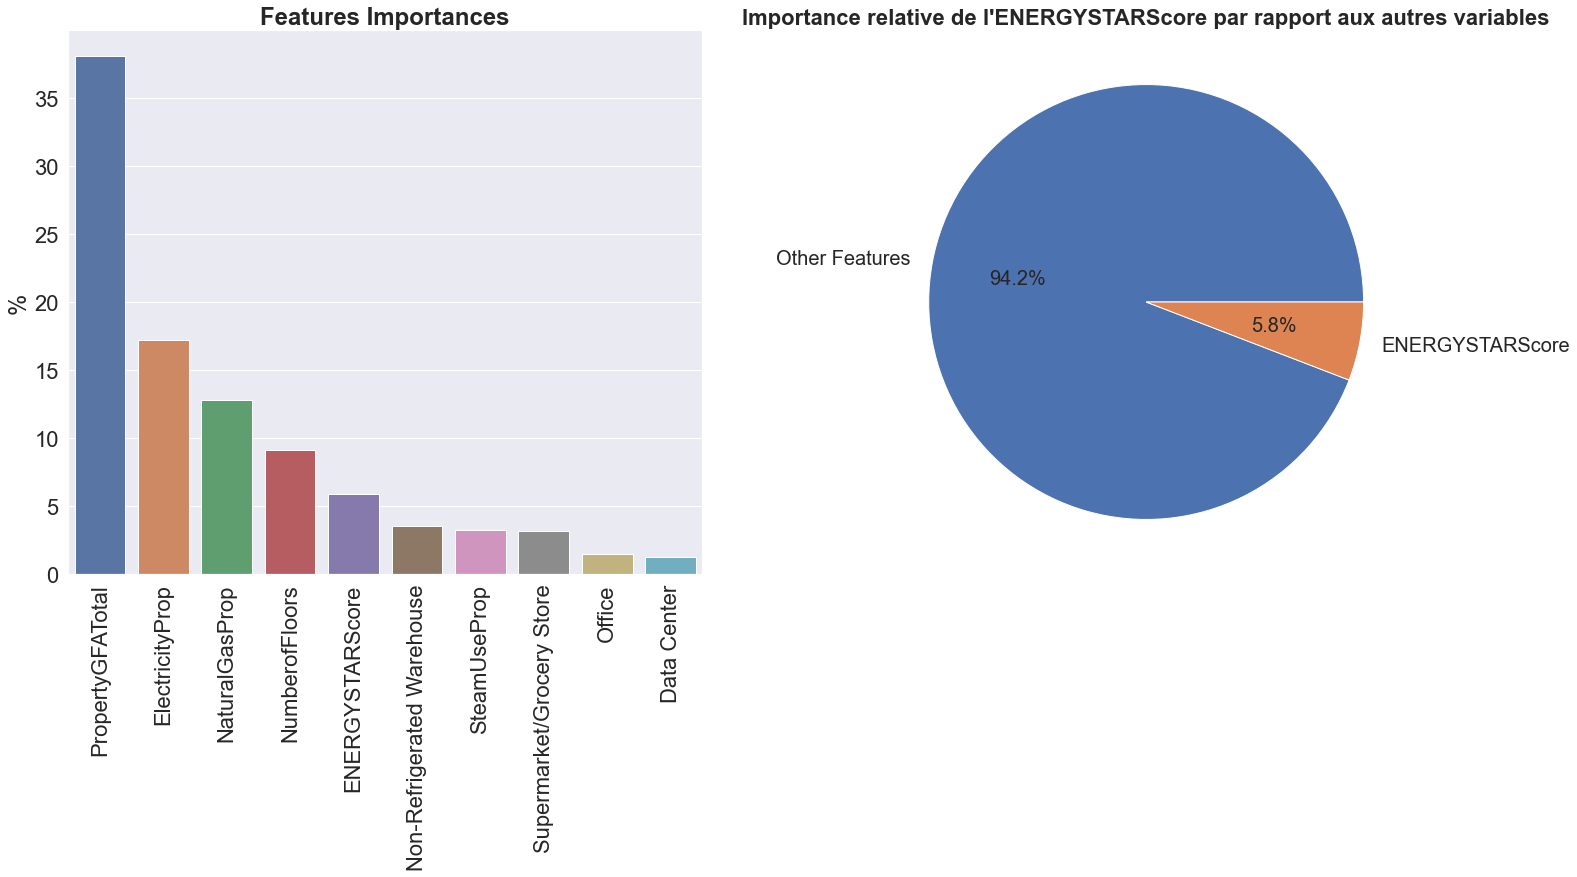

In [127]:
plot_feature_importances(feature_importances, attributes)

La première variable en terme d'importance est la superficie totale du bâtiment.

On retrouve logiquement que les variables relatives à l'énergie en haut du classement puisque physiquement les émissions de CO2 sont le produit de la combustion ou de la production de celles-ci.

Le label ENERGYSTARScore a une importance relative comptant pour 6 % sur le calcul de la prédiction du CO2 de ce modèle.

L'ajout de l'ENERGYSTARScore augemente le R² de ce modèle de 2 centièmes, ce qui est extrémement faible.

## <font color="#114b98" id="section_10">10. SHAP : SHapley Additive exPlanations</font>

In [128]:
import shap
print("SHAP Version : {}".format(shap.__version__))

SHAP Version : 0.41.0


In [129]:
shap.initjs()

In [130]:
X_transfo = preparation.fit_transform(X)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_transfo, y, train_size=0.8, random_state=42)

In [132]:
model_gradientboosting = GradientBoostingRegressor(n_estimators=280,
                                                   max_features=32,
                                                   max_depth=4,
                                                   learning_rate=0.05,
                                                   random_state=0)

In [133]:
explainer = shap.TreeExplainer(model_gradientboosting.fit(X_train, y_train.values.ravel()))

In [134]:
X_importance = X_test[:]

In [135]:
shap_values = explainer.shap_values(X_importance)

In [136]:
df2 = pd.DataFrame(np.zeros, 
                  index = df.drop('TotalGHGEmissions', axis=1).columns.to_list(),
                  columns = ['a'])

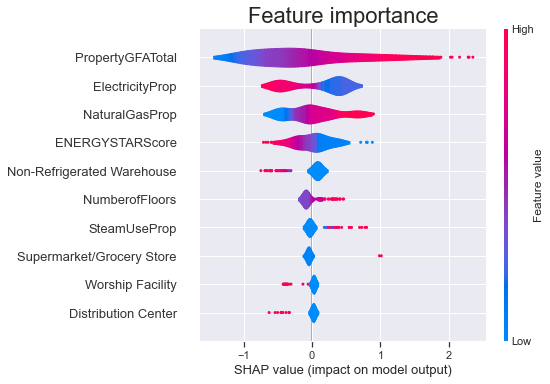

In [137]:
plt.title('Feature importance')
shap.summary_plot(shap_values, X_importance, feature_names=df2.index,
                  plot_type="violin",
                  color="tomato",
                  max_display=10)

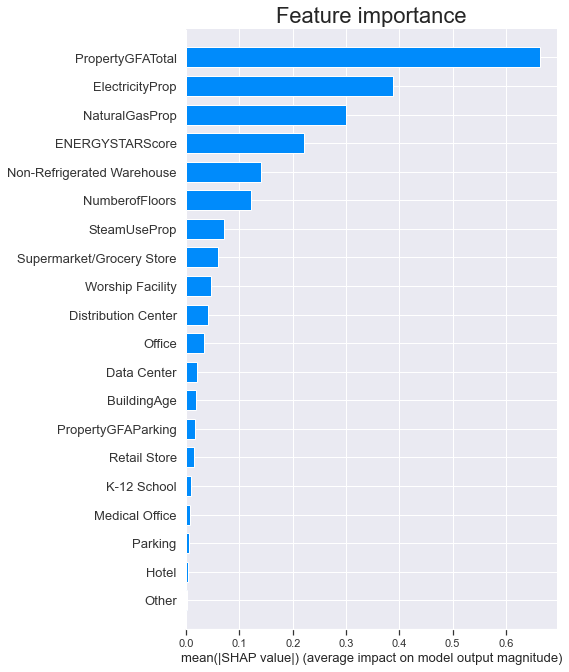

In [138]:
plt.title('Feature importance')
shap.summary_plot(shap_values, X_importance, plot_type='bar', feature_names=df2.index)

## <font color="#114b98" id="section_11">11. Exemple de prédictions d'émissions de CO2</font>

In [139]:
# Fonction pour la transformation inverse sur nos variables à prédire
f = lambda x : np.exp(x) - 1

Je vais sélectionner 100 bâtiments pour vérifier la qualité du modèle.

In [140]:
X_transfo = preparation.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transfo, y, train_size=0.8, random_state=42)

In [141]:
y_true = y_test.apply(f)
y_true.reset_index(inplace = True, drop = True)
y_true = y_true[150:250]

In [142]:
y_pred = pd.DataFrame(model_gradientboosting.predict(X_test), columns=["TotalGHGEmissions"])
y_pred = y_pred.apply(f)
y_pred = y_pred[150:250]

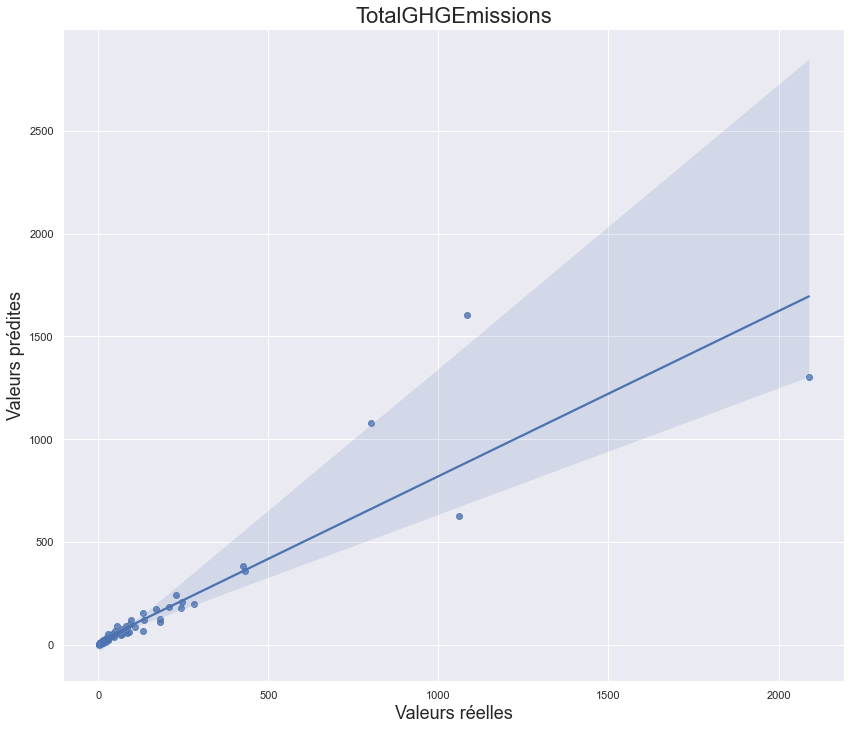

In [143]:
fig = plt.figure(1, figsize=(14,12))

sns.regplot(x=y_true,y=y_pred)
plt.title("TotalGHGEmissions")
plt.xlabel("Valeurs réelles");
plt.ylabel("Valeurs prédites");

Le modèle est peu efficace pour la prédiction des bâtiments à haute émissions de CO2.

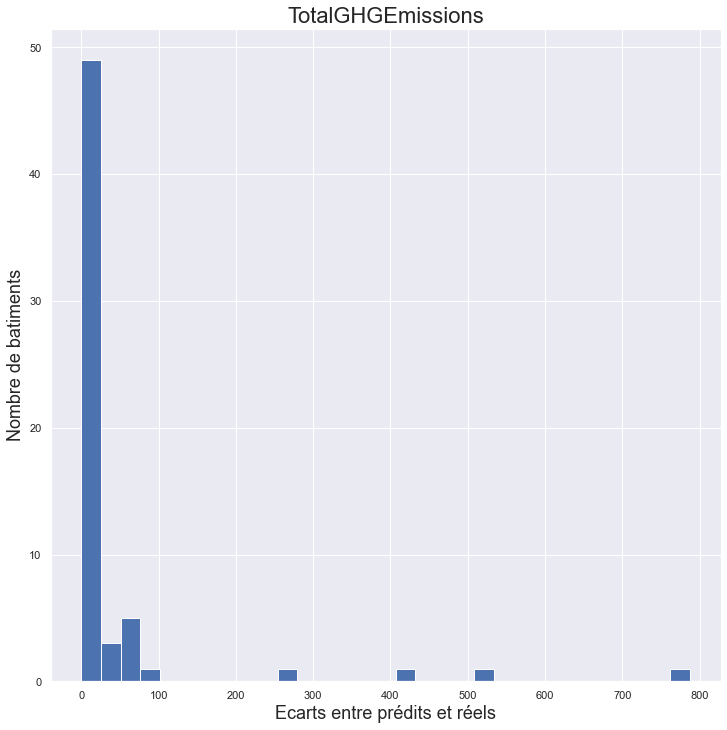

In [144]:
# Histogramme de l'écart entre valeurs prédites et valeurs réelles
fig = plt.figure(figsize=(12,12))
plt.title("TotalGHGEmissions")
plt.xlabel("Ecarts entre prédits et réels")
plt.ylabel("Nombre de batiments")
y = abs(y_pred["TotalGHGEmissions"] - y_true["TotalGHGEmissions"])
plt.hist(y, bins=int(1 + np.log2(len(y_test))*4))
plt.show()

In [145]:
y_pred2 = y_pred[y_pred["TotalGHGEmissions"]<1000]

In [146]:
y_true2 = y_true[y_true["TotalGHGEmissions"]<1000]

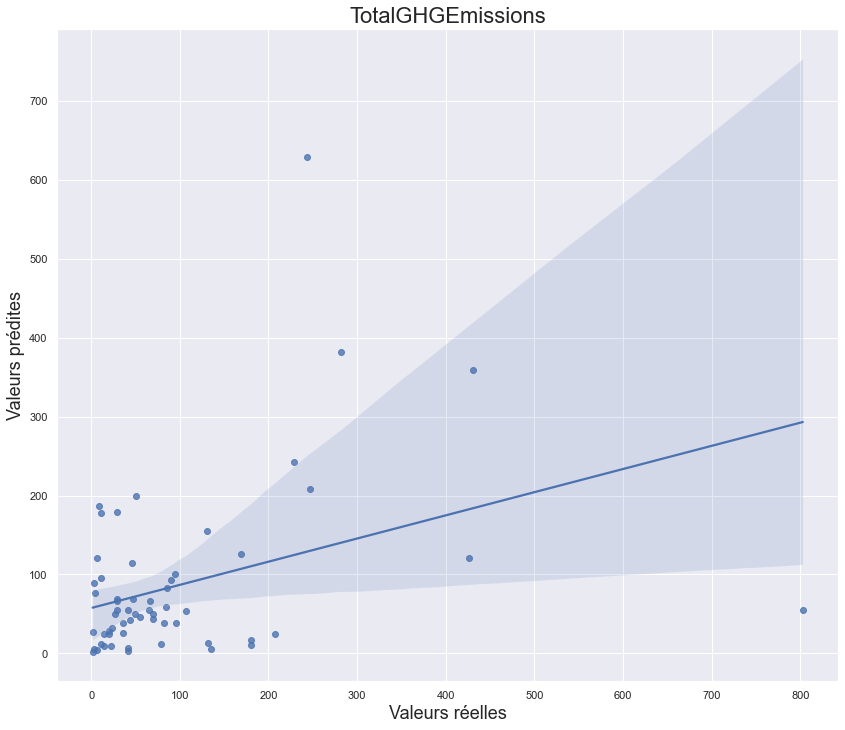

In [147]:
fig = plt.figure(1, figsize=(14,12))

sns.regplot(x=y_true2,y=y_pred2)
plt.title("TotalGHGEmissions")
plt.xlabel("Valeurs réelles");
plt.ylabel("Valeurs prédites");

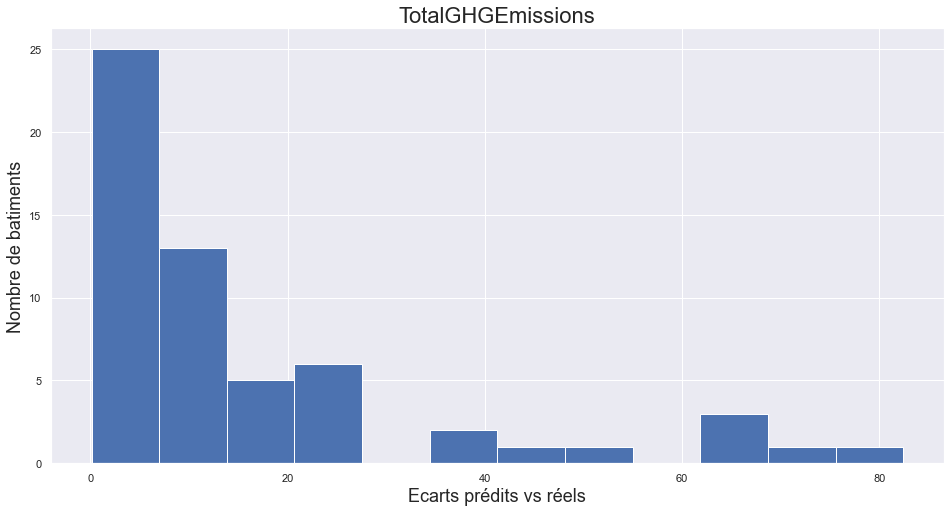

In [148]:
# Histogramme de l'écart entre valeurs prédites et valeurs réelles
fig = plt.figure(figsize=(16,8))
plt.title("TotalGHGEmissions")
plt.xlabel("Ecarts prédits vs réels")
plt.ylabel("Nombre de batiments")
y = abs(y_pred2["TotalGHGEmissions"] - y_true2["TotalGHGEmissions"])
plt.hist(y, bins=int(1 + np.log2(len(y_true2))*2))
plt.show()

En revanche, ce modèle semble très pertinent pour la prédiction des bâtiments à faible émissions de CO2.